1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


Text(0, 0.5, 'Frequencies')

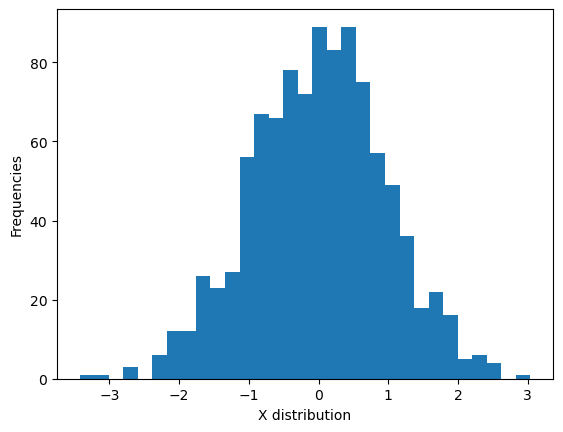

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy 

N = 1000
mean = 0
std = 1
x = np.random.normal(loc = mean, scale = std, size = N)

nbin =np.sqrt(N)

y, bordi_bin, _ = plt.hist(x, bins =int(nbin))
plt.xlabel('X distribution')
plt.ylabel('Frequencies')

<ErrorbarContainer object of 3 artists>

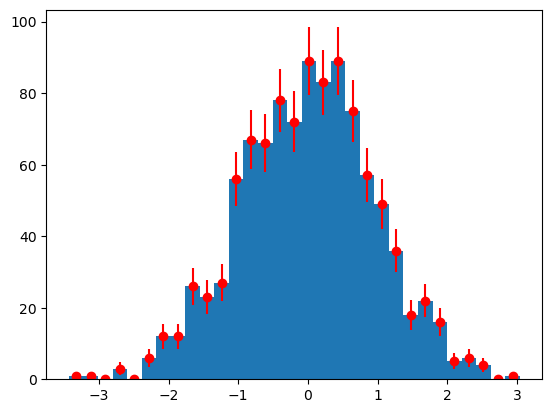

In [2]:
plt.hist(x, bins =int(nbin))
mean_bin = [( bordi_bin[i+1] + bordi_bin[i] )/ 2 for i in range(len(bordi_bin) - 1)]

error =np.sqrt(y) #errpre secondo la definizione di poisson 
plt.errorbar(mean_bin, y, yerr = error, fmt='o',color = 'red')

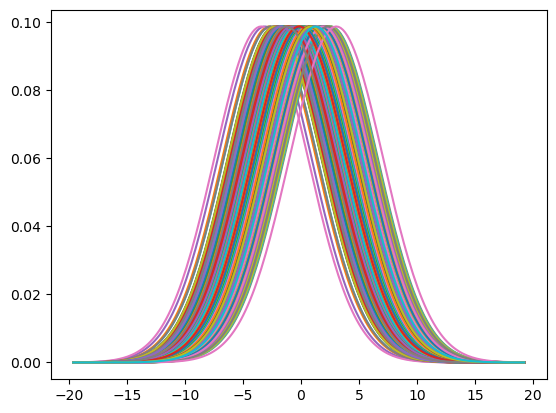

In [3]:
from scipy.stats import norm


std_x = 1.06 * x.std() * x.size ** (1/5)

n_points = 200
x_axis = np.linspace(x.min() - 4 * std_x, x.max() + 4 * std_x, n_points)
#xi = [np.random.normal(loc = i, scale = std_x, size = n_points) for i in x]

pdf  = [norm.pdf(x_axis, loc = i, scale = std_x) for i in x ]

for i in pdf:
    plt.plot(x_axis, i)

In [4]:
#Calcoliamo l'integrale delle gaussiane 
from scipy.integrate import trapz 

sum_gaussian = np.sum(pdf, axis = 0)
area_under_curve = trapz(sum_gaussian, x_axis) #gli do sia i valori di y che i valori di x su cui sommare 
histogram_integral = trapz(y, mean_bin)

normalized_sum_gaussian =  sum_gaussian  / area_under_curve  * histogram_integral

print('Histogram integral: ', histogram_integral)
print('Area under curve: ', area_under_curve)
print('Normalized integral: ', np.sum(normalized_sum_gaussian))


Histogram integral:  208.4570574192622
Area under curve:  999.9969121660217
Normalized integral:  1068.142493464475


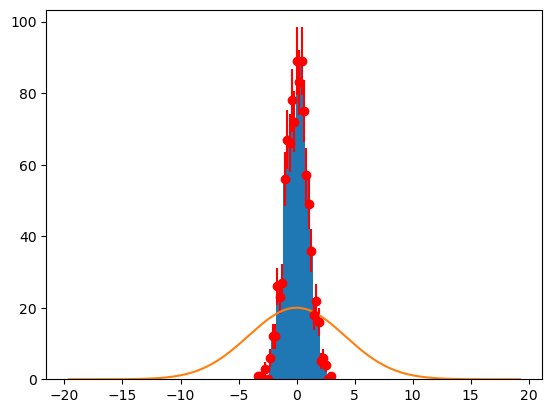

In [5]:
plt.hist(x, bins =int(nbin))
plt.errorbar(mean_bin, y, yerr = error, fmt='o',color = 'red')
plt.plot(x_axis, normalized_sum_gaussian)

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

In [6]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

"wget" non è riconosciuto come comando interno o esterno,
 un programma eseguibile o un file batch.


FileNotFoundError: No such file or directory: 'two_categories_scatter_plot.png'

FileNotFoundError: No such file or directory: 'two_categories_scatter_plot.png'

<IPython.core.display.Image object>

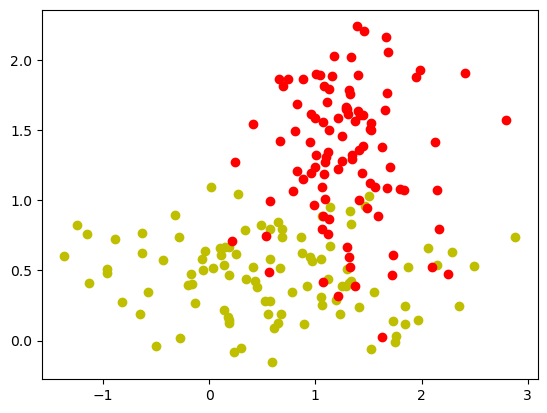

In [99]:
def function(N):
    mean1, mean12 = np.random.random(), np.random.random()
    std1, std12 = np.random.random(), np.random.random()
    
    mean2, mean21 = np.random.random() + 0.5, np.random.random() + 0.5
    std2, std21 = np.random.random(), np.random.random()
    
    x1 = np.random.normal(loc = mean1, scale=std1, size = N)
    x2 = np.random.normal(loc = mean1, scale = std12, size = N)
    y1 = np.random.normal(loc = mean2, scale = std2, size = N)
    y2 = np.random.normal(loc = mean2, scale = std21, size = N)
    
    
    return [x1, x2],  [y1, y2]

X, Y = function(100)

plt.scatter(X[0], X[1], c = 'y')
plt.scatter(Y[0], Y[1], c = 'r')
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [7]:
import pandas as pd
import numpy as np 

data = np.load('residuals_261.npy', allow_pickle = True)

data = data.item()

df = pd.DataFrame(data)
df

residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
2      -7.200000        3.4
3      -4.150000        8.4
4      -6.590000        1.7
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[11131 rows x 2 columns]

In [8]:
df = df[np.abs(df['residuals']) < 2]
residuals = df['residuals']
distances = df['distances']

scipy.stats.linregress(residuals, distances)

LinregressResult(slope=0.577913366635926, intercept=10.025258299436526, rvalue=0.043403510522559086, pvalue=8.717037183576464e-06, stderr=0.1298980963225655, intercept_stderr=0.05919737176060825)

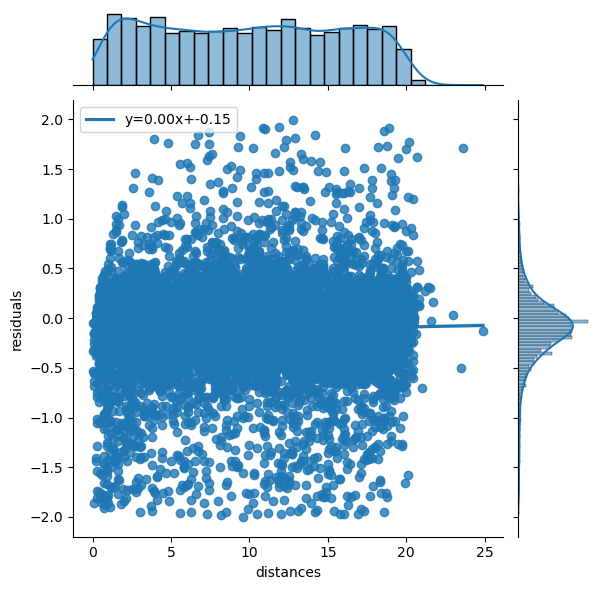

In [70]:
import seaborn as sns #??? rivedere, non so come mostrare i risultati 

'''
sns.lmplot(x = 'distances', y = 'residuals', data = df, height = 3, aspect = 1.5, 
          ci=None, scatter_kws={"color": "blue", "s": 50})
'''
sns.jointplot(x='distances', y='residuals', data=df, kind='reg', line_kws={'label':"y={:.2f}x+{:.2f}".format(slope, intercept)})
plt.legend()



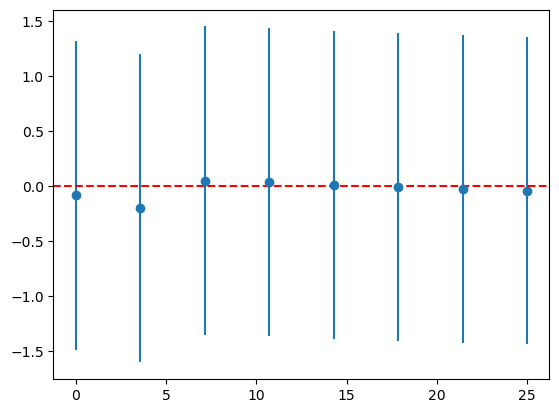

In [102]:
nbin = 8
x = np.linspace(0, 25, nbin)
#distances_sorted = sorted(distances)
#bin_centers = [np.mean(distances_sorted[i:i+nbin]) for i in range(nbin)]

residuals_sorted = sorted(residuals)
y = [np.mean(residuals[i:i+nbin]) for i in range(nbin)]
erry = [np.sqrt(np.abs(np.mean(residuals_sorted[i:i+nbin]))) for i in range(nbin)]

plt.errorbar(x, y, yerr = erry, fmt = 'o', label = 'Box plot')
plt.axhline(y=0, color='r', linestyle='--', label='Zero')


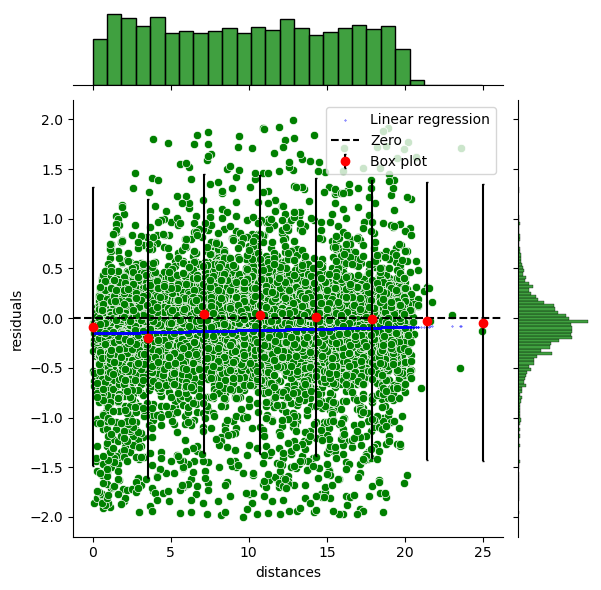

In [103]:
sns.jointplot(x = 'distances', y = 'residuals', data = df, color = 'green')
slope, intercept, _, __, std_err = scipy.stats.linregress(distances, residuals)
plt.scatter(distances, distances * slope + intercept, label = 'Linear regression', s = 0.1, c = 'blue')
plt.errorbar(x, y, yerr = erry, label = 'Box plot', c = 'red', ecolor = 'black', capsize = 1, fmt = 'o')
plt.axhline(y=0, color='black', linestyle='--', label='Zero')

plt.legend(loc = 'upper right')
plt.show()